In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Data loading
data = pd.read_csv('/content/USD_inflation.csv')
print(data.head(10))

   Year  Inflation Rate
0  1800            2.44
1  1801            0.79
2  1802          -15.75
3  1803            5.61
4  1804            4.42
5  1805           -0.85
6  1806            4.27
7  1807           -4.92
8  1808            8.62
9  1809           -2.38


In [ ]:
# Indexing
data.set_index('Year', inplace=True)

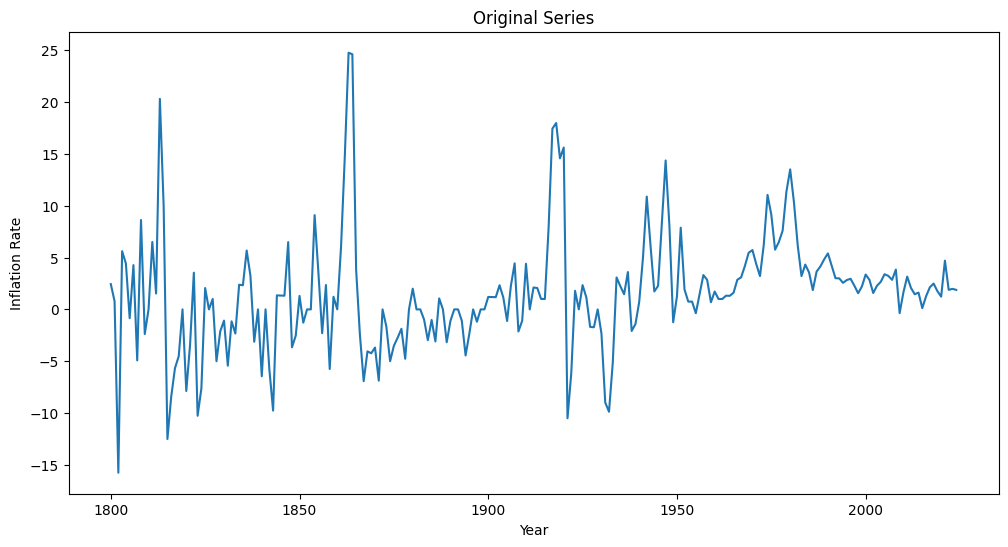

In [ ]:
# Plot orginal Series
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Original Series')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.show()

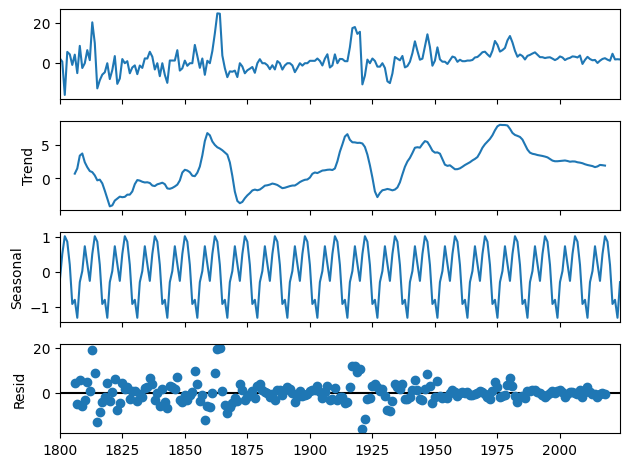

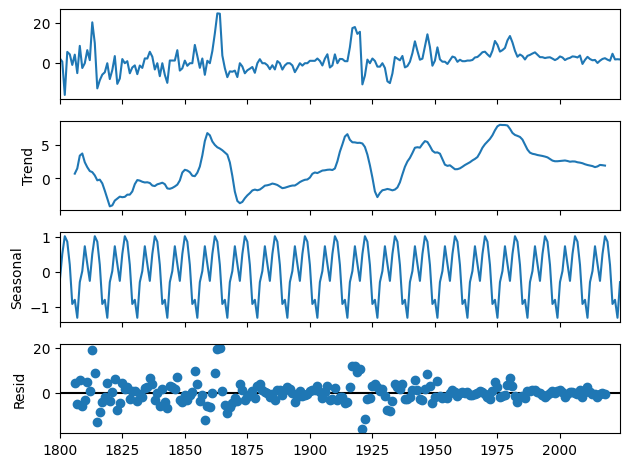

In [ ]:
# Decompose
result = seasonal_decompose(data, model='additive', period=12)
result.plot()


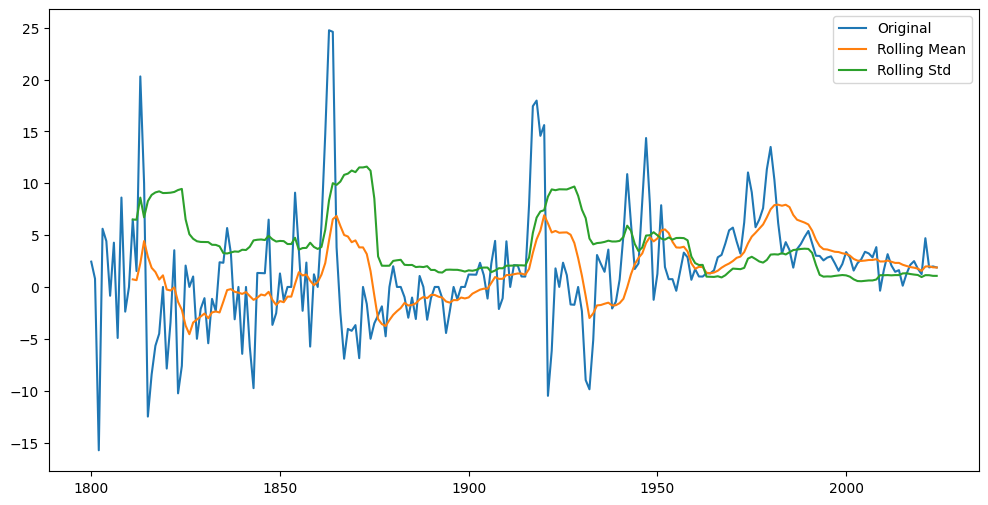

In [ ]:
# Rolling Statitics

rol_mean = data.rolling(window=12).mean()
rol_std = data.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data, label='Original')
plt.plot(rol_mean, label='Rolling Mean')
plt.plot(rol_std, label='Rolling Std')
plt.legend()
plt.show()

In [ ]:
# Dickey Fuller
result = adfuller(data['Inflation Rate'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(f'{key}:{value}')
if result[1] < 0.05:
  print("Series is stationary")
else:
  print("Series is non-stationary")

ADF Statistic: -4.121957
p-value: 0.000891
Critical Values:
1%:-3.460707667106296
5%:-2.874891213486339
10%:-2.573885987711472
Series is stationary


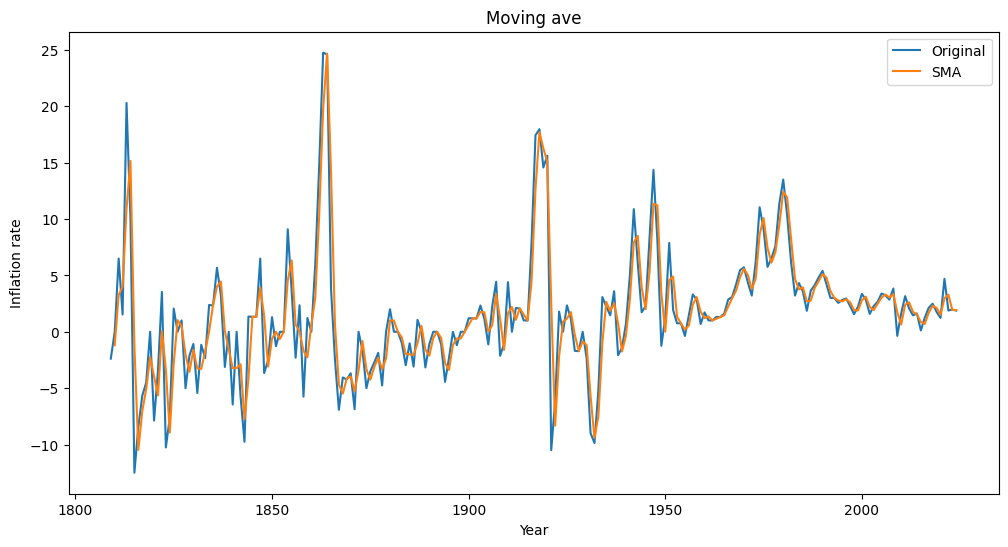

In [ ]:
# SMA

data['SMA_10']=data['Inflation Rate'].rolling(window=2).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Inflation Rate'], label='Original')
plt.plot(data['SMA_10'], label='SMA')
plt.title('Moving ave')
plt.xlabel('Year')
plt.ylabel('Inflation rate')
plt.legend()
plt.show()

In [ ]:
# Differencing

result2 = adfuller(data['Inflation Rate'])
print('p-value before log: ' , result2[1])

# Handle zero and negative values before taking logarithm
data['Inflation Rate_positive'] = data['Inflation Rate'].apply(lambda x: 0.001 if x <= 0 else x)

data['logValue'] = np.log(data['Inflation Rate_positive'])
data['Diff1'] = data['logValue'].diff(1)
data['SeasDiff12'] = data['Diff1'].diff(12)

stationary_series = data['SeasDiff12'].dropna()

adf_stat,p_val,*_=adfuller(stationary_series)

print(f'p-value after logv: {p_val}')


p-value before log:  4.0365829081176295e-05
p-value after logv: 3.2738838580227383e-08


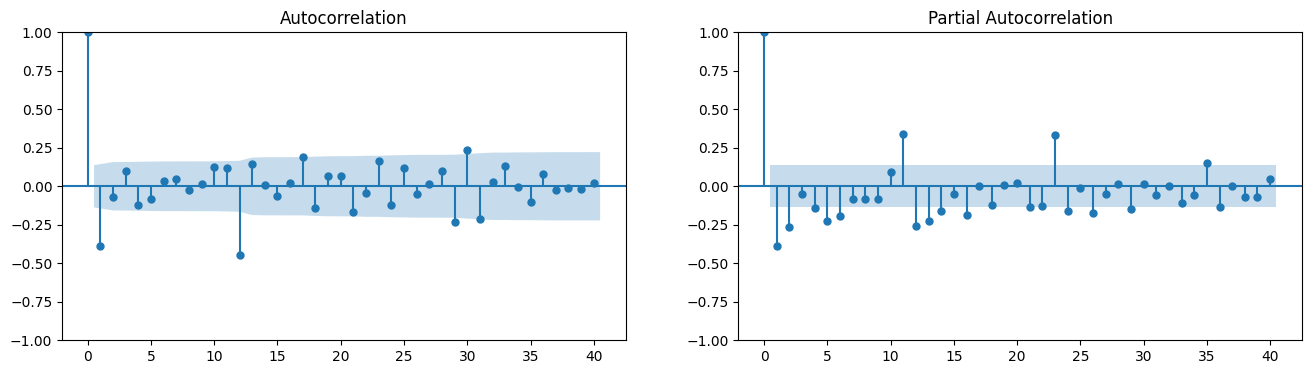

In [ ]:
# ACF & PACF

fig,axes = plt.subplots(1,2,figsize=(16,4))
plot_acf(stationary_series,lags=40,ax=axes[0])
plot_pacf(stationary_series,lags=40,ax=axes[1])
plt.show()

In [ ]:
# ARIMA

ar_model = ARIMA(stationary_series,order=(1,0,0))
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

ma_model = ARIMA(stationary_series,order=(0,0,1))
ma_model_fit = ma_model.fit()
print(ma_model_fit.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             SeasDiff12   No. Observations:                  203
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -619.661
Date:                Fri, 03 Oct 2025   AIC                           1245.321
Time:                        09:55:44   BIC                           1255.261
Sample:                             0   HQIC                          1249.342
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.259     -0.048      0.962      -0.520       0.495
ar.L1         -0.3930      0.058     -6.794      0.000      -0.506      -0.280
sigma2        26.2150      2.072     12.655      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             SeasDiff12   No. Observations:                  203
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -599.038
Date:                Fri, 03 Oct 2025   AIC                           1206.076
Time:                        09:55:45   BIC                           1219.329
Sample:                             0   HQIC                          1211.437
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.013      0.064      0.949      -0.024       0.025
ar.L1          0.3556      0.061      5.792      0.000       0.235       0.476
ma.L1         -1.0000     10.432     -0.096      0.9

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             SeasDiff12   No. Observations:                  203
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -599.038
Date:                Fri, 03 Oct 2025   AIC                           1206.076
Time:                        09:58:20   BIC                           1219.329
Sample:                             0   HQIC                          1211.437
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.013      0.064      0.949      -0.024       0.025
ar.L1          0.3556      0.061      5.792      0.000       0.235       0.476
ma.L1         -1.0000     10.432     -0.096      0.9

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


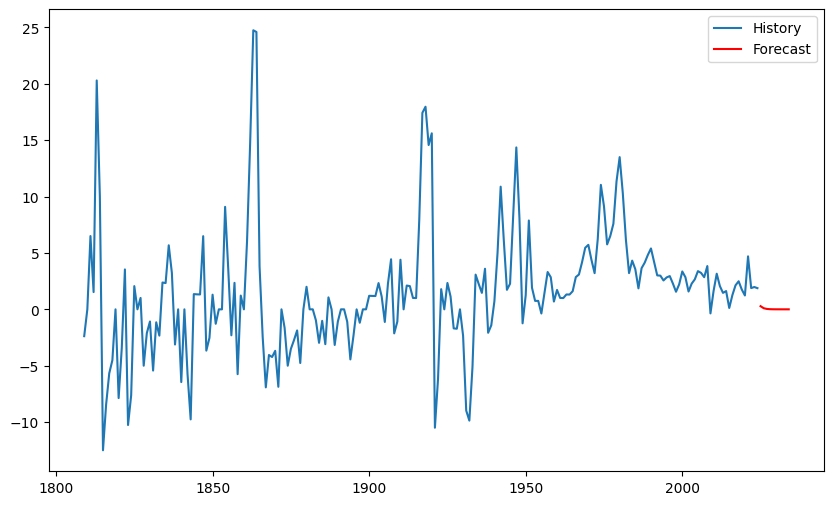

In [ ]:
# ARIMA

arma_model = ARIMA(stationary_series,order=(1,0,1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.summary())

# Forecast
forecast = arma_model_fit.forecast(steps=10)
print(forecast)

# Plotting the forecast
plt.figure(figsize=(10,6))
plt.plot(data['Inflation Rate'],label='History')

# Create the date index for the forecast.
# Use the last year from the original data's index to start the forecast years.
last_year = data.index.max()
# Assuming the data is annual, create a range of years for the forecast
forecast_index = pd.RangeIndex(start=last_year + 1, stop=last_year + 1 + len(forecast), step=1)


# Plot the forecast using the generated index
plt.plot(forecast_index, forecast.values, label='Forecast',color='r')
plt.legend()
plt.show()

